<a href="https://colab.research.google.com/github/ElhassanGitUub/PyProj/blob/main/Finding_How_The_Data_Is_Distributed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Finding How The Data Is Distributed**

In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.

### **Objectives**
In this lab you will perform the following:

Understand the structure of the dataset.

Perform summary statistics and data visualization.

Identify trends in developer experience, tools, job satisfaction, and other key variables.

### Install the required libraries

!pip install pandas

!pip install matplotlib

!pip install seaborn


### Step 1: Import Libraries and Load Data
- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.
- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data

- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.

In [2]:
# Display basic information about the dataset
df.info()

# Display column names
print(df.columns)

# Display summary statistics for numerical columns
df.describe()

# Display summary statistics for categorical columns
df.describe(include=['O'])

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


,0
ResponseId,0
MainBranch,0
Age,0
Employment,0
RemoteWork,10631
...,...
JobSatPoints_11,35992
SurveyLength,9255
SurveyEase,9199
ConvertedCompYearly,42002


- df.info() → Provides an overview of the dataset, including the number of non-null values, data types, and memory usage.
- df.columns → Lists all the column names, helping to identify the available variables.
- df.describe() → Gives summary statistics for numerical columns (e.g., mean, min, max, standard deviation).
- df.describe(include=['O']) → Summarizes categorical columns, showing unique values and frequencies.
- df.isnull().sum() → Checks for missing values in each column

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



RemoteWork             10631
CodingActivities       10971
EdLevel                 4653
LearnCode               4949
LearnCodeOnline        16200
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 109, dtype: int64


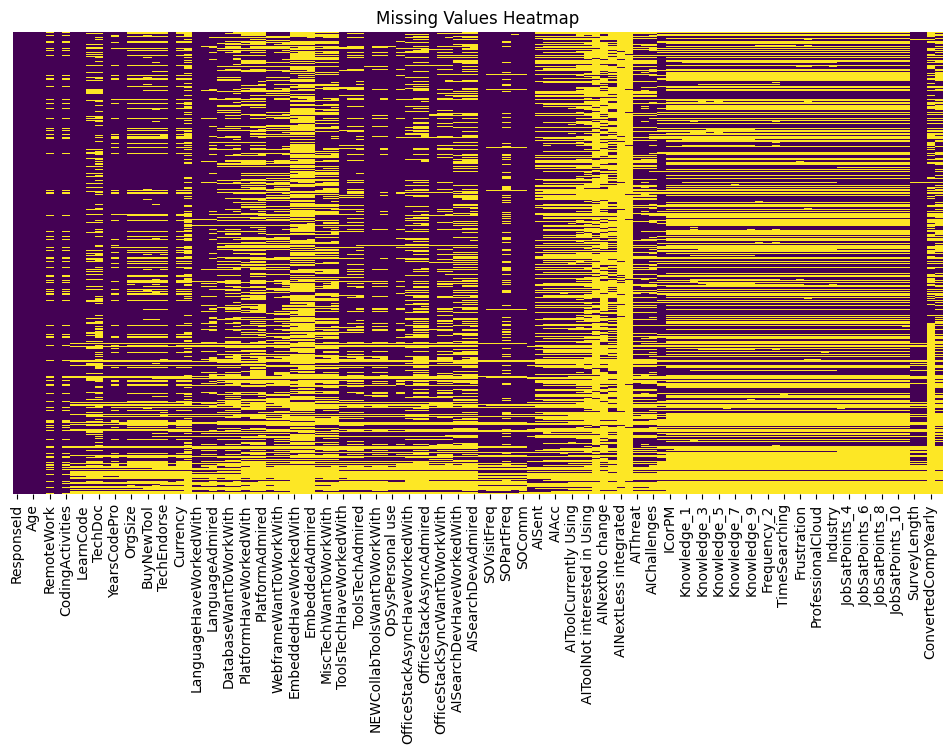

In [3]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display only columns with missing values
missing_values = missing_values[missing_values > 0]
print(missing_values)

# Visualize missing values using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


2. Handle Missing Values

Once we identify missing values, we can either impute (fill in) or remove them.

**Option 1:** Remove Rows with Missing Values
If missing data is minimal:

In [4]:
df_cleaned = df.dropna()


**Option 2:** Impute Missing Values

For Numerical Columns: Replace with mean/median.
For Categorical Columns: Replace with mode (most frequent value).


In [5]:
# Fill missing values in numerical columns with the median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill missing values in categorical columns with the most frequent value
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


<ipython-input-5-c2720bceed31>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [6]:
# Display value counts for key columns
columns_to_examine = ['Employment', 'JobSat', 'YearsCodePro']

for col in columns_to_examine:
    print(f"Value counts for {col}:\n")
    print(df[col].value_counts(dropna=False))  # Include NaN values in the count
    print("\n" + "-"*50 + "\n")


Value counts for Employment:

Employment
Employed, full-time                                                                                                                                  39041
Independent contractor, freelancer, or self-employed                                                                                                  4846
Student, full-time                                                                                                                                    4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                              3557
Not employed, but looking for work                                                                                                                    2341
                                                                                                                                                     ...  
Employed, full-time;Student, 

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


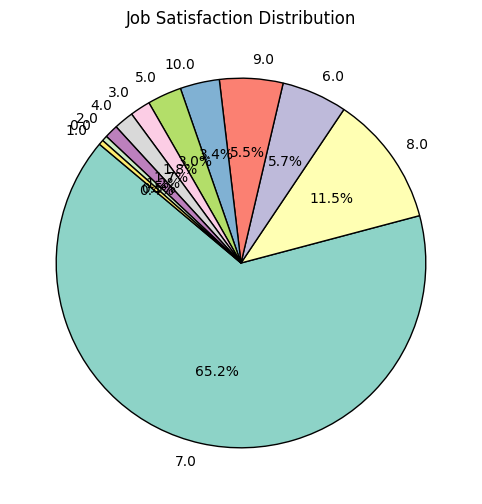

In [8]:
# Code for Pie Chart Visualization
import matplotlib.pyplot as plt

# Drop missing values for better visualization
job_sat_counts = df['JobSat'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
job_sat_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Set3', wedgeprops={'edgecolor': 'black'})

plt.title("Job Satisfaction Distribution")
plt.ylabel('')  # Hide y-label for better readability
plt.show()


<ipython-input-7-8caf241a7ca6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['JobSat'], order=df['JobSat'].value_counts().index, palette="coolwarm")


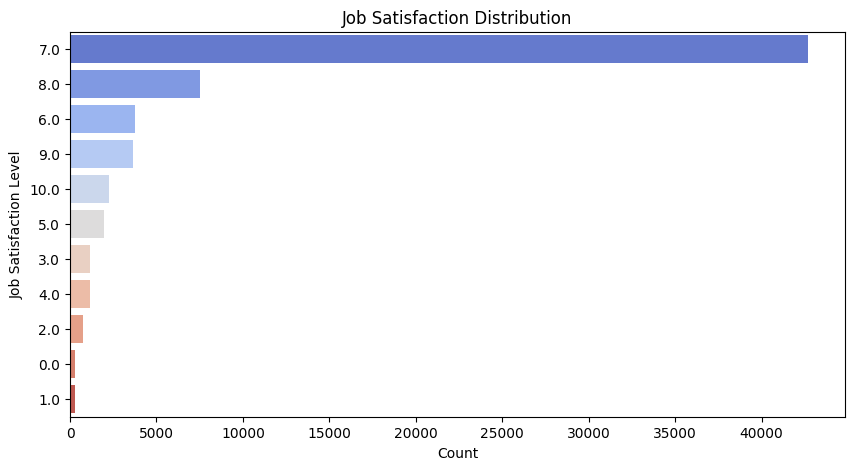

In [7]:
# Code for Bar Plot Visualization (Alternative)

import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(y=df['JobSat'], order=df['JobSat'].value_counts().index, palette="coolwarm")
plt.title("Job Satisfaction Distribution")
plt.xlabel("Count")
plt.ylabel("Job Satisfaction Level")
plt.show()


### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [9]:
# Step 1: Process Language Data
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2

# Helper function to split and count languages
def count_languages(column):
    all_languages = df[column].dropna().str.split(';').explode()
    return Counter(all_languages)

# Count language frequencies
worked_lang_counts = count_languages('LanguageHaveWorkedWith')
wanted_lang_counts = count_languages('LanguageWantToWorkWith')

# Convert to DataFrames for easier manipulation
df_worked = pd.DataFrame(worked_lang_counts.items(), columns=['Language', 'Count_Worked']).set_index('Language')
df_wanted = pd.DataFrame(wanted_lang_counts.items(), columns=['Language', 'Count_Wanted']).set_index('Language')

# Merge datasets to compare overlap
df_lang_compare = df_worked.join(df_wanted, how='outer').fillna(0)

# Convert counts to integers
df_lang_compare = df_lang_compare.astype(int)
df_lang_compare.head()


,Count_Worked,Count_Wanted
Language,,
Ada,542,558
Apex,502,389
Assembly,3233,3007
Bash/Shell (all shells),20412,13744
C,12184,8275


<Figure size 1200x600 with 0 Axes>

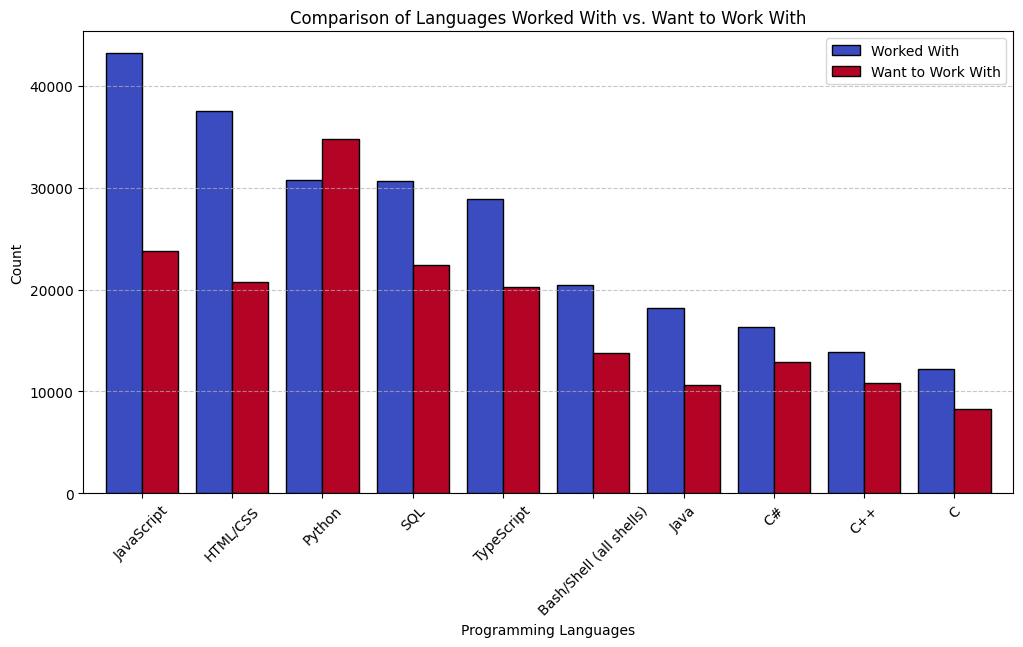

In [10]:
# Step 2: Create a Grouped Bar Chart
# Sort by most popular languages
df_lang_compare = df_lang_compare.sort_values(by="Count_Worked", ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
df_lang_compare.plot(kind='bar', width=0.8, figsize=(12, 6), colormap='coolwarm', edgecolor='black')
plt.title("Comparison of Languages Worked With vs. Want to Work With")
plt.ylabel("Count")
plt.xlabel("Programming Languages")
plt.xticks(rotation=45)
plt.legend(["Worked With", "Want to Work With"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


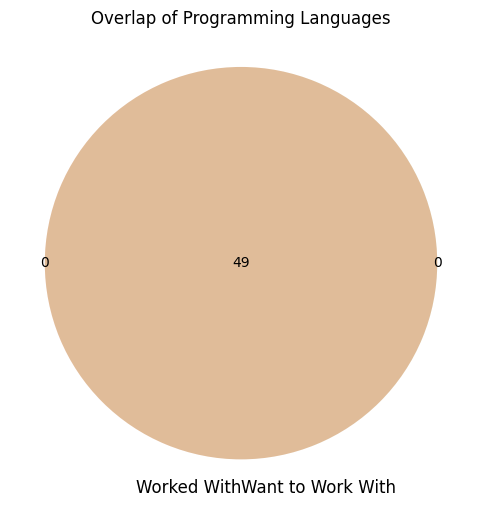

In [11]:
# Step 3: Create a Venn Diagram
# Convert language sets
worked_set = set(df_worked.index)
wanted_set = set(df_wanted.index)

# Create Venn diagram
plt.figure(figsize=(6,6))
venn2([worked_set, wanted_set], set_labels=("Worked With", "Want to Work With"))
plt.title("Overlap of Programming Languages")
plt.show()


### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


## **1. Data Preparation**
Extract relevant columns: RemoteWork and Country (or Region if
available).
Group data by region and count occurrences for each remote work category.
## **2. Visualization Options**
Grouped Bar Chart: Shows how different regions compare in terms of remote work preferences.
Heatmap: Provides a color-coded representation of remote work distribution across regions.

In [12]:
# Step 1: Prepare Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by region and count RemoteWork responses
remote_work_counts = df.groupby(['Country', 'RemoteWork']).size().unstack(fill_value=0)

# Normalize within each region (percentage distribution)
remote_work_percent = remote_work_counts.div(remote_work_counts.sum(axis=1), axis=0) * 100

# Display data sample
remote_work_percent.head()


RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote
Country,,,
Afghanistan,58.928571,23.214286,17.857143
Albania,51.020408,20.408163,28.571429
Algeria,61.038961,10.389610,28.571429
Andorra,40.000000,33.333333,26.666667
Angola,45.000000,30.000000,25.000000


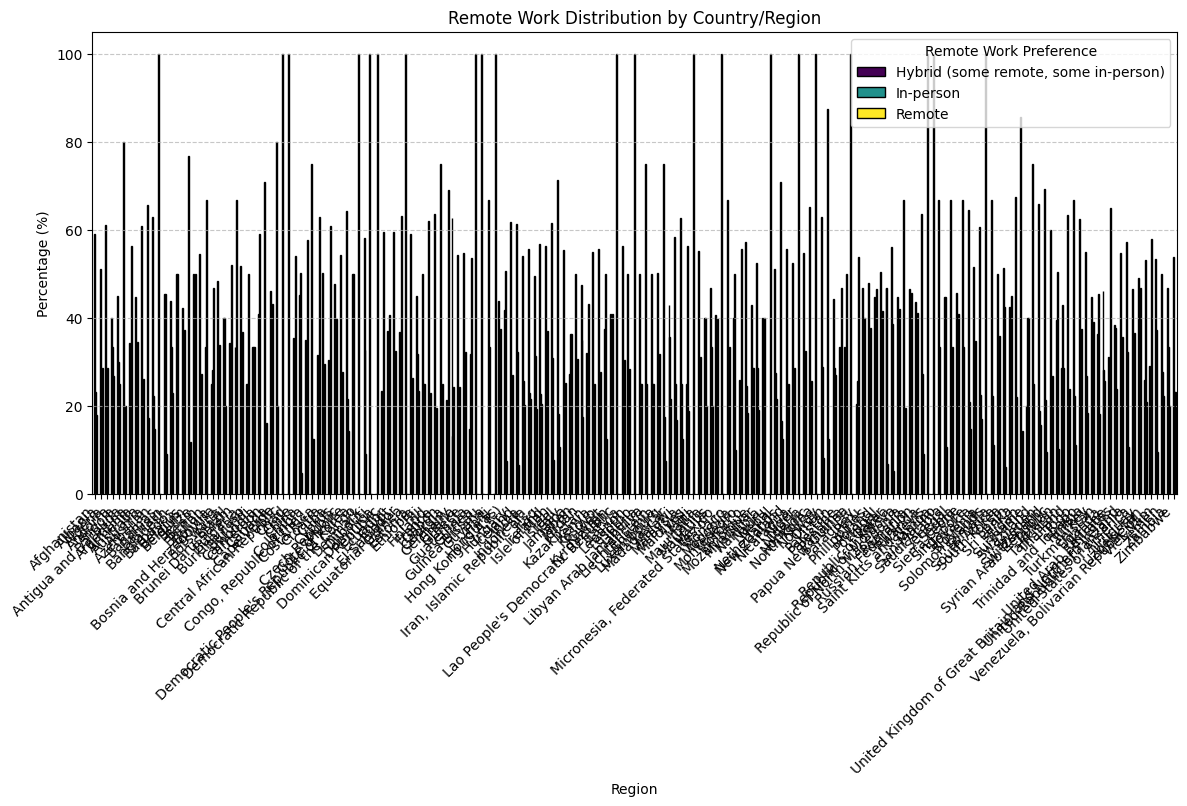

In [13]:
#Step 2: Create a Grouped Bar Chart
# Plot the grouped bar chart
remote_work_percent.plot(kind='bar', figsize=(14, 6), colormap='viridis', edgecolor='black')

plt.title("Remote Work Distribution by Country/Region")
plt.xlabel("Region")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Remote Work Preference")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


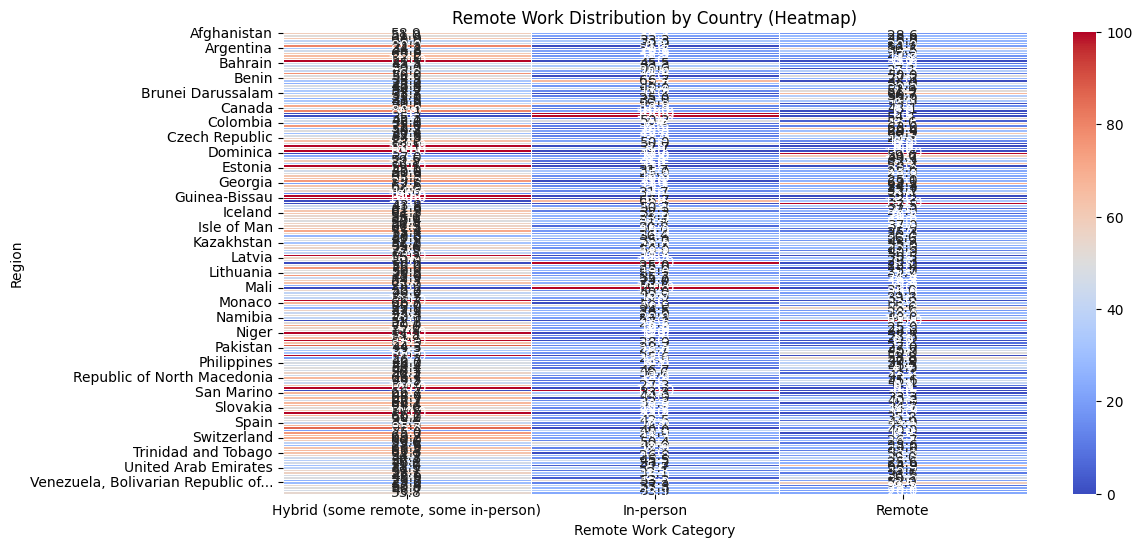

In [14]:
#Step 3: Create a Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(remote_work_percent, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)

plt.title("Remote Work Distribution by Country (Heatmap)")
plt.xlabel("Remote Work Category")
plt.ylabel("Region")
plt.show()


### Step 8: Correlation between Job Satisfaction and Experience

- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


**Step 1: Data Preparation**

Convert JobSat into a numerical scale (e.g., mapping satisfaction levels to numbers).
Convert YearsCodePro into numeric format, handling non-numeric values.

**Step 2: Calculate Correlation**

Use Pearson correlation (if the relationship is linear).
Use Spearman correlation (if the relationship is monotonic but not necessarily linear).

In [17]:

#Step 1: Preprocess Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Convert 'YearsCodePro' to numeric (handling non-numeric values)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Map 'JobSat' responses to numerical scores (example mapping)
satisfaction_mapping = {
    'Very satisfied': 5,
    'Slightly satisfied': 4,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly dissatisfied': 2,
    'Very dissatisfied': 1
}
df['JobSat_numeric'] = df['JobSat'].map(satisfaction_mapping)

# Drop NaN values to ensure accurate correlation computation
df_cleaned = df[['JobSat_numeric', 'YearsCodePro']].dropna()


In [19]:
#Step 2: Compute Correlation
# Pearson correlation (linear relationship)
pearson_corr, pearson_p = pearsonr(df_cleaned['JobSat_numeric'], df_cleaned['YearsCodePro'])

# Spearman correlation (monotonic relationship)
spearman_corr, spearman_p = spearmanr(df_cleaned['JobSat_numeric'], df_cleaned['YearsCodePro'])

# Display results
print(f"Pearson Correlation: {pearson_corr:.3f} (p-value: {pearson_p:.3f})")
print(f"Spearman Correlation: {spearman_corr:.3f} (p-value: {spearman_p:.3f})")


ValueError: x and y must have length at least 2.

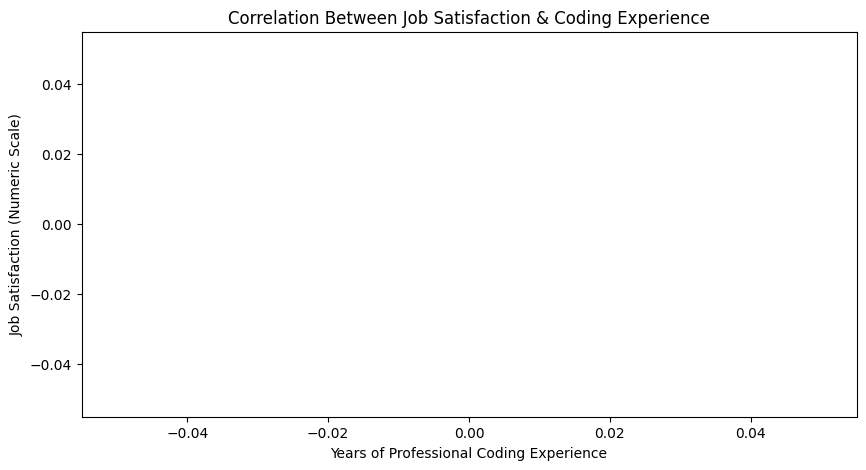

In [18]:
#Step 3: Visualize the Relationship
plt.figure(figsize=(10, 5))
sns.regplot(x=df_cleaned['YearsCodePro'], y=df_cleaned['JobSat_numeric'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Job Satisfaction (Numeric Scale)")
plt.title("Correlation Between Job Satisfaction & Coding Experience")
plt.show()


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.
